<div class="bar_title"></div>

*Enterprise AI*

# Assignment 1 - Introduction to Machine Learning

Gunther Gust / Viet Nguyen<br>
Chair of Enterprise AI

Summer Semester 25

<img src="https://github.com/GuntherGust/tds2_data/blob/main/images/d3.png?raw=true" style="width:20%; float:left;" />

In this assignment, you are going to utilize the skills learned in Tutorial 2 to:

- Load and preprocess data, including imputing missing values, scaling, and encoding features
- Train and evaluate simple regression models
- Get to know the concept of overfitting in machine learning

There will be several code cells that contain some test cases created by `assert` functions. For example:

```python
# read and store csv file in the "data" variable
data = a_function_to_read_csv("your_data_path/file.csv")
```

Assume the correct data shape is be `(20, 5)` (20 rows and 5 columns), your code should pass this `assert` successfully:

```python
# the cell will return nothing, but notify that it has run successfully.
assert data.shape == (20, 5)
```

Please DO NOT remove or modify the cells with `assert` functions. They are meant to let you know that your functions are working correctly, and you are on the right track. In addition, you PASS the assignment ONLY IF **your code logic is correct** AND **you pass all the `assert` functions**. Good luck!

# 1. Data Exploration

In this exercise, we will utilize the Medical Cost Personal Dataset from Kaggle available [here](https://www.kaggle.com/datasets/mirichoi0218/insurance/data). The dataset has been downloaded and adapted to suit the specific requirements of this assignment.



In [3]:
import pandas as pd

(a) Load the dataset from the csv file `insurance.csv` store in the folder `data`. Store the DataFrame object in the `df` variable:

In [4]:
# YOUR CODE HERE
df = pd.read_csv("./data/insurance.csv")

(b) Display the first 10 rows of your dataset:

In [5]:
# YOUR CODE HERE
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


(c) Display the statistical descriptions of the features in the DataFrame:

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1334.000000,1338.000000,1338.000000
mean,39.207025,30.651094,1.094918,13270.422265
std,14.049960,6.097522,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.237500,0.000000,4740.287150
50%,39.000000,30.380000,1.000000,9382.033000
75%,51.000000,34.600000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


(d) Which columns provide statistical descriptions? Why?

Answer: 4 columns: age, bmi, children and charges return the statistics. The other columns are not in numerical format.

(e) Extract and store all data frames whose `sex` feature is `female` in the variable `female_records`. Then, compute the ratio of female patients with respect to the entire population and store it in the `ratio` variable. You can check this [resource](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html) to work on this:

In [7]:
# YOUR CODE HERE
female_records = df[df["sex"] == "female"]
ratio = len(female_records) / len(df)

In [8]:
# Running this cell should return no error
assert female_records[female_records["sex"] == "male"].values.shape[0] == 0
assert 0.48 <= ratio <= 0.50

# 2. Data Preprocessing

Once the data is loaded, we proceed with data processing, an essential step in any data science project.

## 2.1. Data Splitting

(a) We will use individual personal record features to predict medical costs per person. To start, create a DataFrame `X` containing all columns except the `charges` column, which will serve as the features matrix. The target variable `Y` will be the "charges" column representing the labels.

In [9]:
# YOUR CODE HERE
# hint: use axis=1 for X
X = df.drop("charges", axis=1)
# "charges" column as labels
Y = df["charges"] 

(b) Split dataset into `train` and `test` set using `train_test_split` function from `scikit-learn`. Ensure that:
- `random_state` is set to `0`
- The test size is `20%` of the dataset

In [10]:
from sklearn.model_selection import train_test_split
# YOUR CODE HERE
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0)

In [11]:
# Running this cell should return no error
assert len(X_train) + len(X_test) == len(X)
assert len(Y_train) + len(Y_test) == len(Y) 
assert 0.78 <= len(X_train) / len(X) <= 0.84

## 2.2. Data Imputation

(a) Next, let's check if the dataset contains any missing values:

In [12]:
# YOUR CODE HERE
# display the summary of missing values per column
X_train.isna().sum()

age         0
sex         0
bmi         3
children    0
smoker      0
region      7
dtype: int64

Now, let's perform imputation for the missing values of two columns

In [13]:
# Please run this cell
from sklearn.impute import SimpleImputer
origin_southwest_count = len(X_train[X_train["region"] == "southwest"])

(b) Now, create two imputers using SimpleImputer with the following strategies:

- Initialize `bmi_imputer` with the `mean` strategy.
- Initialize `region_imputer` with the `constant` strategy, setting the `fill_value` to `southwest`

In [14]:
# YOUR CODE HERE
bmi_imputer = SimpleImputer(strategy="mean")
region_imputer = SimpleImputer(strategy="constant", fill_value="southwest")

(c) Use `bmi_imputer` to impute the column `bmi` and `region_imputer` to impute the column `region` of `X_train`, respectively:

In [15]:
# YOUR CODE HERE
bmi_values = pd.DataFrame(bmi_imputer.fit_transform(X_train[["bmi"]]),index=X_train.index, columns=["bmi"])
region_values = pd.DataFrame(region_imputer.fit_transform(X_train[["region"]]),index=X_train.index, columns=["region"])

(d) Store them back in the original columns:

In [16]:
# YOUR CODE HERE
X_train["bmi"] = bmi_values
X_train["region"] = region_values

In [17]:
# Running this cell should return no error
assert X_train.isna().sum().age == 0 
assert X_train.isna().sum().region == 0
# This checks if you use the constant strategy correctly
# Please ensure random_state=0 of the train_split_test function
assert origin_southwest_count + 7 == len(X_train[X_train["region"] == "southwest"])

## 2.3. Data Encoding & Scaling

After imputation, it’s time to perform data encoding and appropriately scale the features. Let’s begin by standardizing the training features.

In [18]:
from sklearn.preprocessing import StandardScaler

(a) Please select all the `numerical` columns and store them in `numerical_columns` variable. Then, initialize a `StandardScaler` and perform scaling procedure. Finally, store the scaled values back to the original column of `X_train`:

In [19]:
# YOUR CODE HERE
numerical_columns = X_train.select_dtypes(exclude="object").columns
scaler = StandardScaler()
scaled_values = pd.DataFrame(scaler.fit_transform(X_train[numerical_columns]),index=X_train.index,columns=numerical_columns)
X_train[numerical_columns] = scaled_values

Next, we perform one-hot encoding in categorical variables.

In [20]:
from sklearn.preprocessing import OneHotEncoder

(b) Extract categorical columns and store them in `categorical_columns` variable:

In [21]:
# YOUR CODE HRE
categorical_columns = X_train.select_dtypes(include="object").columns

(c) Intialize `OneHotEncoder` and set the `sparse_output` parameter to `False`. Then, start encoding the values:

In [22]:
one_hot_encoder = OneHotEncoder(sparse_output=False)
encoded_values =  pd.DataFrame(one_hot_encoder.fit_transform(X_train[categorical_columns]),index=X_train.index, columns=one_hot_encoder.get_feature_names_out())

(d) Create a new DataFrame `X_train_no_cat` by:
- Removing all original categorical columns of `X_train`
- Concatenate itself with the encoded values above

In [23]:
# YOUR CODE HRE
X_train_no_cat = ...
X_train_no_cat = ...

X_train_no_cat = X_train.drop(["region", "sex", "smoker"], axis=1)
X_train_no_cat = pd.concat([X_train_no_cat, encoded_values], axis=1)

In [24]:
# Running this cell should return no error
assert set(categorical_columns.unique()) == {"sex", "smoker", "region"}
assert set(numerical_columns.unique()) == {"age", "bmi", "children"}
# Make sure the standardization is correct
import numpy as np
num_cols = ["age", "bmi", "children"]
assert all(np.isclose(X_train_no_cat[val].mean(), 0.0, atol=1e-6) for val in num_cols)
assert all(np.isclose(X_train_no_cat[val].std(ddof=0), 1.0, atol=1e-6) for val in num_cols)

# 3. Model Training

In this exercise, we will train a simple **supervised machine learning** model, called **linear regression**. Recall that in supervised machine learning, we learn a function from labeled training data `(X_train, Y_train)` that can predicts labels for new, unseen inputs. 

A model"s parameters (or *weights*) represent the importance or influence of each input feature in making predictions. During training, the model starts with initial guesses for these parameters. Then, using the input data, an optimization algorithm adjusts them to minimize a loss function (e.g., Mean Squared Error), which measures how far the model"s predictions are from the actual observed values. 

## 3.1. Model Selection: Linear Regression

To predict individual medical costs billed by health insurance, we’ll use a linear regression model. This model assumes a linear relationship between the input features (e.g., age, BMI, smoking status) and the target variable (insurance costs). Mathematically, the model is described as: 

$$
\hat{y} = w_0 + w_1x_1 + w_2x_2 + \dots + w_nx_n,
$$
where:
- $\hat{y}$: predicted medical cost
- $w_0$: intercept (baselien cost when all features are zero)
- $w_1,\dots w_n$: weights assigned to each features $(x_1,\dots,x_n)$
- $x_1,\dots x_n$: input features

We can measure the prediciton error using Mean Squared Error (MSE) loss:

$$
\mathcal{L}_{MSE}(y_i, \hat{y}_i) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2,
$$
where $y_i$ is the actual cost and $\hat{y}_i$ is the predicted cost for the observation.

The set of weights $w_i$ can be optimized by analytically computing the derivative of the function $\mathcal{L}_{MSE}$ (w.r.t the weights). If you want to derive the closed-form solution (normal equations), check out this [blog](https://medium.com/data-science/analytical-solution-of-linear-regression-a0e870b038d5). 

In this exercise `sklearn` provides you with a class [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) that automatically minimizes the MSE under the hood.


## 3.2. Model Training & Evaluation

We first import some necessary libraries from `scikit-learn`:

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### 3.2.1. Training The Model

(a) Create a `model` from `LinearRegression` class of `sklearn` and train the model:

In [26]:
# YOUR CODE HERE
model = LinearRegression()
model.fit(X_train_no_cat, Y_train)

LinearRegression()

(b) Compute the in-sample predictions:

In [27]:
# YOUR CODE HERE
in_sample_preds = model.predict(X_train_no_cat)

(c) Compute the MSE loss using `mean_squared_error` function for the in-sample predictions:

In [28]:
# YOUR CODE HERE
mse_train = mean_squared_error(Y_train, in_sample_preds)
print(f"In-sample MSE: {mse_train:.4f}")

In-sample MSE: 37679644.1281


### 3.2.2. Testing the model

(a) Apply the same imputation procedures to the test set `X_test` using the imputers created in `Section 2.` Important: Use the `transform` method (not `fit_transform`) to ensure the imputations are based on the statistics derived from the training set:

In [29]:
# YOUR CODE HERE
# impute test values
bmi_values_test = pd.DataFrame(bmi_imputer.transform(X_test[["bmi"]]),index=X_test.index, columns=["bmi"])
region_values_test = pd.DataFrame(region_imputer.transform(X_test[["region"]]),index=X_test.index, columns=["region"])

# store imputed values to the original columns
X_test["bmi"] = bmi_values_test
X_test["region"] = region_values_test

(b) Apply the same scaling procedure to the set `X_test`. Again, use the `transform` function:

In [30]:
# YOUR CODE HERE
# scale test values
numerical_columns_test = X_test.select_dtypes(exclude="object").columns
scaled_values_test = pd.DataFrame(scaler.transform(X_test[numerical_columns_test]),index=X_test.index,columns=numerical_columns_test)

# store scaled values to the original columns
X_test[numerical_columns_test] = scaled_values_test

(c) Apply the same encoding procedure for categorical columns to the set `X_test`:

In [31]:
# YOUR CODE HERE
categorical_columns_test = X_test.select_dtypes(include="object").columns
encoded_values_test =  pd.DataFrame(one_hot_encoder.transform(X_test[categorical_columns_test]),index=X_test.index, columns=one_hot_encoder.get_feature_names_out())

(d) Create a new DataFrame `X_test_no_cat` by:
- Removing all original categorical columns of `X_test`
- Concatenate itself with the encoded values above

In [32]:
X_test_no_cat = X_test.drop(["region", "sex", "smoker"], axis=1)
X_test_no_cat = pd.concat([X_test_no_cat, encoded_values_test], axis=1)

(e) Compute the out-sample predictions and the test MSE:

In [33]:
out_sample_preds = model.predict(X_test_no_cat)

mse_test = mean_squared_error(Y_test, out_sample_preds)
print(f"Out-sample MSE: {mse_test:.4f}")

Out-sample MSE: 31972838.8698


(f) Why is out-sample result (test set) worse than in-sample (train set) result?

The out-of-sample (test set) results are often worse than the in-sample (training set) results because the model is evaluated on new, unseen data that it hasn't been trained on. During training, the model learns patterns specific to the training data, which can sometimes include noise or peculiarities that don’t generalize well. This phenomenon is known as overfitting. As a result, the model performs better on the training data but less accurately on the test data, which reflects its ability to generalize to new examples.

`Note: please skip this question, as explained in the tutorial that the linear regression model underfits in this case, making the train loss higher than the test loss.`

Remark: While Linear Regression is effective for modeling linear relationships, it has limitations when dealing with complex, non-linear patterns in data. For example, You can try using Random Forest, which can boost the performance of this task significantly since it can capture non-linear relationships between features. 

Linear regression remains a powerful tool when real-world data exhibits only linear relationships. For example, one can perform data exploratory analysis (e.g., scatter plots, correlation checks) to determine if linear trends in the data exist.



# 4. Overfitting and regularization

In this exercise, you will explore the concepts of *overfitting* and *regularization* in machine learning. We will use another synthetic dataset to study this effect. 

We have seen how linear regression fits a straight line to the data, assuming a linear relationship between input features and the target variable. But what if the relationship is more complex? One natural extension is **polynomial regression**, where we use higher powers of the input variable(s) to capture non-linear trends. For example, a model of degree $d$ would look like this:

$$
\hat{y} = w_0 + w_1 x + w_2 x^2 + \dots + w_d x^d.
$$

Note that while polynomial regression models non-linear relationships between variables using polynomial terms, it remains linear in the coefficients $w_i$.

## 4.1. Fitting polynomial functions

You don't need to program anything in subsection `4.1`, please answer the theoretical questions at the end. Let's first import some necessary libraries for visualization:

In [34]:
# Run this cell, you dont need to code anything here
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

Here, we provide the code of fitting different polynomial functions using linear regression. The dataset consists of 15 2D points, which is split into `70%` for training and `30%` for testing. The `degrees` variable stores different values of `d` in the function provided above. First, we plot 3 models fitted using three different degree values: `1`, `3` and `20`, respectively:

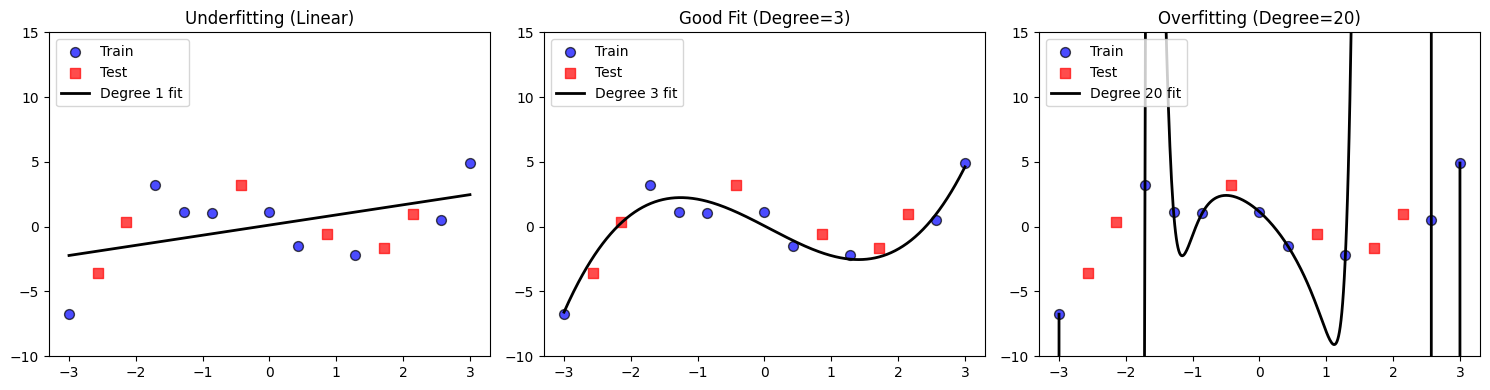

In [35]:
np.random.seed(42)
n_points = 15
X = np.linspace(-3, 3, n_points)
y = 0.5*X**3 - 2*X + np.random.normal(0, 1.5, n_points)

test_mask = np.random.choice([True, False], size=n_points, p=[0.3, 0.7])
X_train, X_test = X[~test_mask], X[test_mask]
y_train, y_test = y[~test_mask], y[test_mask]

plt.figure(figsize=(15, 4))
degrees = [1, 3, 20]  
titles = ["Underfitting (Linear)", "Good Fit (Degree=3)", "Overfitting (Degree=20)"]

for i, degree in enumerate(degrees):
    plt.subplot(1, 3, i+1)
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train[:, np.newaxis], y_train)

    X_plot = np.linspace(-3, 3, 500)
    y_plot = model.predict(X_plot[:, np.newaxis])

    plt.scatter(X_train, y_train, s=50, color="blue", alpha=0.7, label="Train", edgecolor="k")
    plt.scatter(X_test, y_test, s=50, color="red", alpha=0.7, label="Test", marker="s")
    plt.plot(X_plot, y_plot, "k-", linewidth=2, label=f"Degree {degree} fit")

    plt.ylim(-10, 15)
    plt.title(titles[i])
    plt.legend(loc="upper left")

plt.tight_layout()
plt.show()

You can adjust the number of degrees in the interactive UI below:

In [36]:
# This is required for interactive UIs
%matplotlib notebook

# reproducability
np.random.seed(0)
# generate random data points
X = np.sort(2 * np.random.rand(25, 1) - 1, axis=0)
# this is a true polynomial function y = 1 + 2x - 3x^2 + 0.5x^3 + small noise (epsilon)
y_true = 1 + 2 * X - 3 * X**2 + 0.5 * X**3
y = y_true + 0.1 * np.random.randn(25, 1)

# split data
split_index = int(0.7 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# add controlled noise to a few training points
y_train[2] += 1.0
y_train[5] -= 1.0
y_train[8] += 0.8

fig = plt.figure(figsize=(10, 6))
gs = fig.add_gridspec(3, 1, height_ratios=[6, 1, 1])
ax = fig.add_subplot(gs[0])

init_degree = 2
X_plot = np.linspace(-1, 1, 200).reshape(-1, 1)

def create_model(degree):
    return make_pipeline(PolynomialFeatures(degree=degree), Ridge(alpha=0.0))

model = create_model(init_degree)
model.fit(X_train, y_train)
y_plot = model.predict(X_plot)

ax.scatter(X_train, y_train, color='blue', label='Train', marker='o')
ax.scatter(X_test, y_test, color='red', label='Test', marker='s')
[line] = ax.plot(X_plot, y_plot, color='black', linewidth=2, label='Model')
ax.set_title('Polynomial Regression')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.legend()
ax.grid(True)

ax_degree = fig.add_axes([0.25, 0.15, 0.6, 0.03])
slider_degree = Slider(ax_degree, 'Degree', 1, 15, valinit=init_degree, valstep=1)

info_ax = fig.add_axes([0.25, 0.05, 0.65, 0.05])
info_ax.axis("off")
info_text = info_ax.text(0, 0.5, "", va='center', fontsize=10)

def update(val):
    degree = int(slider_degree.val)

    model = create_model(degree)
    model.fit(X_train, y_train)
    y_pred_plot = model.predict(X_plot)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)

    line.set_ydata(y_pred_plot)

    info_text.set_text(
        f"Degree: {degree} | Train MSE: {train_mse:.4f} | Test MSE: {test_mse:.4f}"
    )

    fig.canvas.draw_idle()

slider_degree.on_changed(update)
update(None)

plt.show()

<IPython.core.display.Javascript object>

You can see that increasing the polynomial degree comes with a critical tradeoff. While higher degrees allow the model to capture non-linear patterns, they also risk memorizing noise in the training data rather than the true relationship. This phenomenon, called **overfitting**, produces models that excel on training data but fail to generalize to new examples. The visualizations above illustrate how model complexity impacts this balance.



(a) Now, try to answer the following questions by reading about [Overfitting polynomial functions](https://en.wikipedia.org/wiki/Overfitting#Polynomial_fitting) and the [bias-variance tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff) and make connections with the overfitting/underfitting effect:

1. What is underfitting (intuition in a sentence)?
2. What is overfitting (intuition in a sentence)?
3. How does bias-variance tradeoff relate to polynomial degree?
4. Why does a polynomial model with degree=20 achieve near-zero training error but fail on test data?
5. If a model has low training MSE but high test MSE, is it underfitting or overfitting? 
6. What if both training MSE and test MSE are high?


## Answers
1. When your model is too simple to capture the real pattern.
2. When your model memorizes every training example and does not generalize well on test data.
3. The polynomial degree directly controls the bias-variance tradeoff:
- Low degrees (e.g., 1-2) have high bias (systematic underprediction) but low variance (consistent predictions)
- Medium degrees (e.g., 3-4) balance bias and variance
- High degrees (≥5) have low bias but high variance (predictions fluctuate wildly with small data changes)
4. It perfectly matches every training point (including noise) but makes chaotic predictions elsewhere (like a student memorizing answers without understanding).
5. Overfitting - the model works well only on seen training data (memorization) but fails to generalize. 
6. Underfitting - the model is too simple to capture the underlying pattern in the dataset.

## 4.2. Adding regularization

In this section, we'll explore how regularization helps prevent overfitting by constraining model complexity. Let's compare the objective functions:

**Without regularization (Ordinary Least Squares (OLS)):**
$$
\mathcal{L}_{MSE}(y_i, \hat{y}_i) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2. \quad \quad (1)
$$ 

**With regularization (Ridge Regression)**:
$$
\mathcal{L}_{MSE}(y_i, \hat{y}_i) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} w_j^2, \quad \quad (2)
$$
where:
- First term measures fitting errors (same as OLS)
- Second term is the **regularization penalty** 
- $\lambda$ controls regularization strength (higher $\lambda$ = stronger constraint)

Function `(1)` is what we used in the exercise 3, and it is the default objective function in `scikit-learn` for `LinearRegression` models.

Now, let's fit degree-10 polynomial models with and without regularization. `sklearn` provides the class `Ridge` that implements Equation `(2)`:

In [37]:
# Generate data
np.random.seed(42)
n_points = 20
X = np.linspace(0.1, 0.2, 20)  
y = 0.1*X + np.random.normal(0, 5, 20) 

# Split train/test sets
test_mask = np.random.choice([True, False], size=n_points, p=[0.3, 0.7])
X_train, X_test = X[~test_mask], X[test_mask]
y_train, y_test = y[~test_mask], y[test_mask]

plt.scatter(X_train, y_train);

<IPython.core.display.Javascript object>

(a) Please look at the examples in `4.1` and implement the two models with the data points `X_train` and labels `y_train`. For the Ridge case, use `alpha` parameter to set the $\lambda$ variable to `5`:

In [38]:
degree = 15
# YOUR CODE HERE
# Linear regression without regularization
model_lin = make_pipeline(PolynomialFeatures(degree), LinearRegression())
# YOUR CODE HERE
# Linear regression without l2 regularization, use `alpha` to set the lambda in equation (2) to 5
model_lin_reg = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=5))

# Run this cell to fit the models after completing the code above
# Fit the models
model_lin.fit(X_train[:, np.newaxis], y_train)
model_lin_reg.fit(X_train[:, np.newaxis], y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=15)),
                ('ridge', Ridge(alpha=5))])

Now, let's print out the coefficients learned by the two models below:

In [39]:
# Run this cell, you don't need to modify it
np.set_printoptions(suppress=True, precision=10, floatmode="fixed")
without_reg_coef = model_lin.named_steps["linearregression"].coef_
with_reg_coef = model_lin_reg.named_steps["ridge"].coef_
print("Coefficients without regularization:", without_reg_coef)
print("Coefficients with Ridge regularization:", with_reg_coef)

Coefficients without regularization: [-8.7363359358e+14 -1.1453193973e+10  3.5176718897e+11 -6.3133445066e+12
  7.3075814402e+13 -5.6664198554e+14  2.9476238754e+15 -9.9090766887e+15
  1.9227225598e+16 -1.3892286784e+16 -1.1969924168e+16  8.8571359529e+15
  1.8169978391e+16  1.5436816892e+16  9.3318929974e+15  4.5996604165e+15]
Coefficients with Ridge regularization: [ 0.0000000000 -0.2110239593 -0.0643963018 -0.0150424562 -0.0031846273
 -0.0006437743 -0.0001271008 -0.0000247906 -0.0000048075 -0.0000009304
 -0.0000001801 -0.0000000349 -0.0000000068 -0.0000000013 -0.0000000003
 -0.0000000001]


(b) Answer the following questions:

1. What can you observe from the two weight vectors?
2. Can you guess which component that force the weights of the Ridge regression behave that way? 

Hint 1: Read the section `1.1. Polynomial Curve Fitting` in this [book](https://www.microsoft.com/en-us/research/wp-content/uploads/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf#page=21.10), page 4-11. You can take a look at `Figure 1.4`, `Table 1.1`, `Figure 1.6` and `Figure 1.7` for quick hints. 

Hint 2: Both questions can be answered in one sentence, so don't overengineer it with chatbots, e.g., ChatGPT :-)

## Answers
1. The unregularized weights explode to extremely large values (e.g., 1.9e+16), while Ridge regularization shrinks all weights toward zero, with higher-degree terms (later positions) forced closer to zero.

2. Ridge regression adds an L2 penalty term ($\lambda \sum_{j=1}^{p} w_j^2$) to the loss function. 

For those who are curious, this term helps:
- Makes the optimization problem well-posed (no singular matrices). If you increase the degree higher in the code above, you will see there are cases that the problem is ill-posed, where singular matrices occur.
- Enforces weight shrinkage proportional to $\lambda$ (here $\lambda = 10$). You can notice that $\ln \lambda$ is used in the book instead of $\lambda$. Both of them are mathematically equivalent (see chapter 1 of the book again). but the natural log-scale is used for many benefits such as making the training more stable and simplifying gradient-based optimizations.
- Implicitly prioritizes smaller weights through the quadratic penalty

## 4.3. Tweaking the effect of regularization

In this section, we will continue investigating the effect of the regularization term $\lambda$ of Equation `(2)`. We will implement it with natural log of $\lambda$, because:

- $\lambda$ has the exponential range `[0.001, 0.01, 0.1, 1, 10, 100]`.
- $\lambda$ lets us search linearly (e.g., -3, -2, -1, 0, +1, +2). This helps to convert mutiplicative relationships into additive ones, which makes optimization and tuning more intuitive and effective.
- Some algorithms can converge faster in log-space.

Please run the code below:

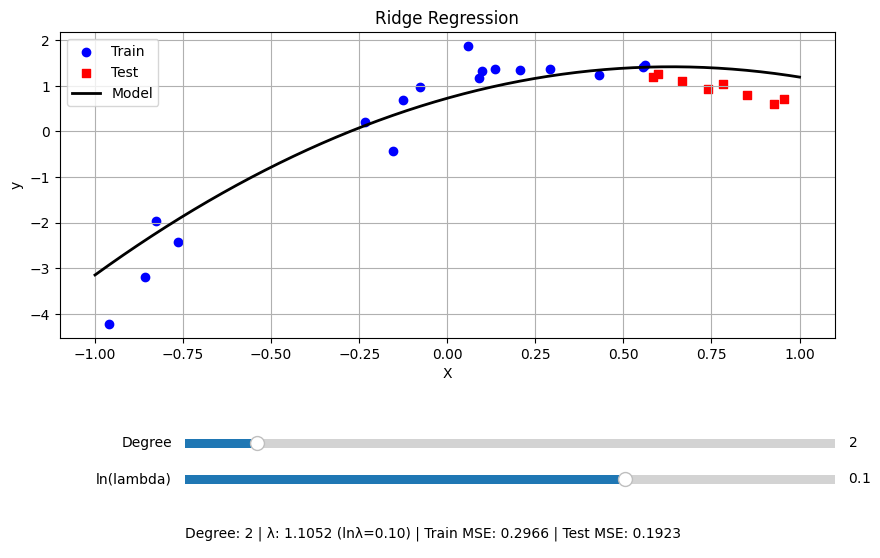

In [40]:
# This is required for interactive UIs
%matplotlib inline

# reproducability
np.random.seed(0)
# generate random data points
X = np.sort(2 * np.random.rand(25, 1) - 1, axis=0)
# Again, it is just a true polynomial function y = 1 + 2x - 3x^2 + 0.5x^3 + small noise (epsilon)
y_true = 1 + 2 * X - 3 * X**2 + 0.5 * X**3
y = y_true + 0.1 * np.random.randn(25, 1)

split_index = int(0.7 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# add controlled noise to a few training points
y_train[2] += 1.0
y_train[5] -= 1.0
y_train[8] += 0.8

fig = plt.figure(figsize=(10, 6))
gs = fig.add_gridspec(3, 1, height_ratios=[6, 1, 1])
ax = fig.add_subplot(gs[0])

init_degree = 2
init_ln_lambda = 0.1
X_plot = np.linspace(-1, 1, 200).reshape(-1, 1)

def create_model(degree, alpha):
    return make_pipeline(PolynomialFeatures(degree=degree), Ridge(alpha=alpha))

model = create_model(init_degree, np.exp(init_ln_lambda))
model.fit(X_train, y_train)
y_plot = model.predict(X_plot)

ax.scatter(X_train, y_train, color='blue', label='Train', marker='o')
ax.scatter(X_test, y_test, color='red', label='Test', marker='s')
[line] = ax.plot(X_plot, y_plot, color='black', linewidth=2, label='Model')
ax.set_title('Ridge Regression')
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.legend()
ax.grid(True)

ax_degree = fig.add_axes([0.25, 0.18, 0.65, 0.03])
ax_lambda = fig.add_axes([0.25, 0.12, 0.65, 0.03])
slider_degree = Slider(ax_degree, 'Degree', 1, 10, valinit=init_degree, valstep=1)
slider_lambda = Slider(ax_lambda, 'ln(lambda)', -6.0, 3.0, valinit=init_ln_lambda)

info_ax = fig.add_axes([0.25, 0.02, 0.65, 0.05])
info_ax.axis("off")
info_text = info_ax.text(0, 0.5, "", va='center', fontsize=10)

def update(val):
    degree = int(slider_degree.val)
    ln_lambda = slider_lambda.val
    alpha = np.exp(ln_lambda)

    model = create_model(degree, alpha)
    model.fit(X_train, y_train)
    y_pred_plot = model.predict(X_plot)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)

    line.set_ydata(y_pred_plot)

    info_text.set_text(
        f"Degree: {degree} | λ: {alpha:.4f} (lnλ={ln_lambda:.2f}) | Train MSE: {train_mse:.4f} | Test MSE: {test_mse:.4f}"
    )

    fig.canvas.draw_idle()

slider_degree.on_changed(update)
slider_lambda.on_changed(update)

update(None)
plt.show()


(a) Answer in each case, whether it is **overfitting**, **underfitting** or **good fit**, and briefly explain why (please ignore the ill-conditioned cases displayed in the plots):
1. Set polynomial degree $d = 4$ and $\ln \lambda = -6$. 
2. Set polynomial degree $d = 4$ and $\ln \lambda \approx -3$.
3. Set polynomial degree $d = 4$ and $\ln \lambda = 3$. 
4. Set polynomial degree $d = 10$ and $\ln \lambda = 3$.

## Answers
1. Overfitting: model is free to make large coefficient values to reduce training errors. Too high degrees leads to model fitting to random noise. When you set the polynomial degree to 4 and choose almost no regularization ($\lambda \approx 0$), the model has just enough complexity to begin fitting not only the true underlying pattern in the data but also the noise. Since there’s no penalty on large coefficients, the model is free to stretch itself to reduce training error as much as possible, often resulting in overfitting. It may follow the data too closely, including the random fluctuations that don’t reflect the true trend.

2. Good fit: when you introduce a moderate level of regularization by setting $\ln \lambda = -3.0$, which corresponds to $\lambda \approx 0.05$, you’re telling the model to be "more cautious". It still uses the degree-4 polynomial form, but it’s less willing to create large coefficients just to fit a few noisy points. As a result, the model smooths out those fluctuations and ends up fitting the overall trend more accurately. This is often the best-case scenario: a model that’s complex enough to represent the real relationship but still generalizes well thanks to the regularization.

3. Underfitting: Even though the model still has access to a degree-4 polynomial, the regularization penalty now strongly discourages using higher-order terms. Most of the polynomial's power gets "turned off," and the model is forced to behave like a simpler one, which may be closer to a straight line or a low-degree curve. It becomes "overly cautious" and fails to capture the necessary curvature in the data, resulting in underfitting. In other words, the model is technically capable but too restricted to use its capacity effectively.

4. Underfitting: A degree-10 polynomial without regularization would wildly overfit, which is expected to produce a very wiggly curve that fits every noise in the data. But with such strong regularization, most of the high-degree terms are suppressed. The model can’t express those wavy patterns anymore, and it ends up behaving like a much simpler model, similar to what happened with degree 4 and strong regularization. So despite having access to a high-degree polynomial, the model is heavily constrained and ends up underfitting again.
